In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
paths = "/Users/kai/Documents/Desktop/CO2_adsorption/Extracted_data files/Methane_done"


In [36]:
data_base = pd.read_excel(os.path.join(paths,"1.xlsx"),skiprows=1)
for i in range(2,108):
    data_temp= pd.read_excel(os.path.join(paths,str(i)+".xlsx"),skiprows=1)
    data_base = pd.concat([data_base,data_temp],axis=0)

In [37]:
data_base.to_excel(os.path.join(paths,"Methane.xlsx"))

# Assign group numbers for adsorption data

In [1]:
import pandas as pd
import numpy as np
import os

paths = "/Users/kai/Documents/Desktop/CO2_adsorption/new_data"

In [21]:
data_base = pd.read_excel(os.path.join(paths,"Ethane&Ethylene-01-01-2022.xlsx"),skiprows=1)

In [23]:
def assign_group(df):
    
    cols = [8,9,10,11,17]
    group =[]
    rows = len(df)
    i = df.iloc[0,cols]
    idx =0
    for j in range(rows):
        if i.compare(df.iloc[j,cols],align_axis=0).size<=0:
            group.append(idx)
        else:
            i = df.iloc[j,cols]
            idx+=1
            group.append(idx)
    return pd.DataFrame({'index':group})
            


In [24]:
index = assign_group(data_base)
index.to_csv(os.path.join(paths,'Ethane&Ethylene-01-10-2022.csv'))

In [168]:
# group_index checking
for i in range(index['index'].max()+1):
    counts = list(index['index']).count(i)
    #print(counts)
    if counts<=2:
        print(i)

# Curve Fitting Test

In [4]:
from scipy.optimize import curve_fit

def fit_fun_F(x,K,n):
    return K*np.power(x,n)
def fit_fun_L(x,K,Qm):
    return Qm*K*x/(1+K*x)

In [45]:
import pandas as pd
import numpy as np
import os

paths = "C:/Kai_Zhang/MachineLearning/Unified gas Adsorption/CO2_adsorption/new_data"
data_base = pd.read_excel(os.path.join(paths,"Methane-02-01-2022.xlsx"),skiprows=1)

In [46]:
from sklearn.metrics import r2_score
group_num = list(set(data_base['Index'].values))
params = []
df_feature = data_base.iloc[0:1,:] # extracting only the first line of each isotherm
for i in group_num:
    temp_group = data_base[data_base['Index']==i]
    x = temp_group['Pressure'].values
    y = temp_group['Adsorp(mmol/g)'].values
    popt,correl = curve_fit(fit_fun_F,x,y)
    r2 = r2_score(fit_fun_F(x,*list(popt)),y)
    params.append(list(np.append(popt,r2)))
    df_feature = pd.concat([df_feature,temp_group.iloc[0:1,:]],axis=0)
    

In [47]:
df_feature =df_feature.iloc[1:,:]
df_feature["K"] = np.array(params)[:,0] 
df_feature["n"] = np.array(params)[:,1]
df_feature["R2"] = np.array(params)[:,2]

In [44]:
df_feature.to_csv(os.path.join(paths,'Methane-fitting-02-01-2022.csv'))

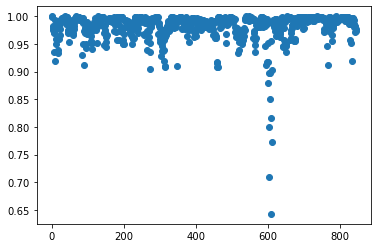

In [48]:
import matplotlib.pyplot as plt
y = df_feature["R2"]
x = range(len(y))
plt.scatter(x,y)

In [200]:
fit_res = pd.concat([df_feature,df],axis =0)

(2, 4)